PROJECT - GEZONDHEIDSZORG

In [21]:
import os
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn3
from PIL import Image
import pandas as pd
import sqlite3
import json
import numpy as np
import seaborn as sns

In [22]:
!pwd
patient_DF = pd.read_csv('./new_rest_api_netlify.csv',',')
display(patient_DF)

/home/hossein/MakeAIWork/projects/proj_gezondheidszorg/rest_server/medisch_centrum_randstad/data


/tmp/ipykernel_37142/3319966386.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  patient_DF = pd.read_csv('./new_rest_api_netlify.csv',',')


,id,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar
0,1,73.9,185.0,99.7,0.9,0.0,2.4,73.1,6.9
1,2,86.0,172.0,105.4,1.8,8.1,0.4,85.0,4.2
2,3,83.3,176.0,111.4,1.1,0.8,4.6,81.6,7.5
3,4,82.8,164.0,111.4,4.7,11.8,1.0,81.0,2.9
4,5,78.7,178.0,71.6,1.5,8.3,4.9,75.0,5.5
...,...,...,...,...,...,...,...,...,...
4091,4092,80.3,176.0,115.9,3.7,0.1,5.6,80.7,5.8
4092,4093,75.3,162.0,129.6,3.6,6.2,5.6,71.1,7.6
4093,4094,93.1,189.0,115.3,2.7,9.4,4.9,90.0,6.6
4094,4095,77.9,170.0,90.8,2.3,13.2,0.8,75.9,6.2


In [23]:
patient_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4096 entries, 0 to 4095
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        4096 non-null   int64  
 1   genetic   4095 non-null   float64
 2   length    4093 non-null   float64
 3   mass      4094 non-null   float64
 4   exercise  4095 non-null   float64
 5   smoking   4096 non-null   float64
 6   alcohol   4094 non-null   float64
 7   lifespan  4094 non-null   float64
 8   sugar     4095 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 288.1 KB


In [24]:
patient_DF = patient_DF.dropna()
display(patient_DF)
patient_DF.info()

,id,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar
0,1,73.9,185.0,99.7,0.9,0.0,2.4,73.1,6.9
1,2,86.0,172.0,105.4,1.8,8.1,0.4,85.0,4.2
2,3,83.3,176.0,111.4,1.1,0.8,4.6,81.6,7.5
3,4,82.8,164.0,111.4,4.7,11.8,1.0,81.0,2.9
4,5,78.7,178.0,71.6,1.5,8.3,4.9,75.0,5.5
...,...,...,...,...,...,...,...,...,...
4091,4092,80.3,176.0,115.9,3.7,0.1,5.6,80.7,5.8
4092,4093,75.3,162.0,129.6,3.6,6.2,5.6,71.1,7.6
4093,4094,93.1,189.0,115.3,2.7,9.4,4.9,90.0,6.6
4094,4095,77.9,170.0,90.8,2.3,13.2,0.8,75.9,6.2


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 0 to 4095
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        4084 non-null   int64  
 1   genetic   4084 non-null   float64
 2   length    4084 non-null   float64
 3   mass      4084 non-null   float64
 4   exercise  4084 non-null   float64
 5   smoking   4084 non-null   float64
 6   alcohol   4084 non-null   float64
 7   lifespan  4084 non-null   float64
 8   sugar     4084 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 319.1 KB


In [25]:
#To find duplicate values

patient_DF_duplicate = patient_DF[patient_DF.duplicated(['id'], keep =False)]
display(patient_DF_duplicate)


,id,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar


In [26]:
patient_data_sort=patient_DF.transform(np.sort)
display(patient_data_sort)

,id,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar
0,1,63.9,154.0,50.0,0.1,0.0,0.0,57.0,0.7
1,2,63.9,154.0,50.0,0.1,0.0,0.0,57.0,0.7
2,3,63.9,154.0,50.0,0.1,0.0,0.0,58.7,0.7
3,4,64.0,154.0,50.1,0.1,0.0,0.0,58.9,0.7
4,5,64.0,155.0,50.1,0.1,0.0,0.0,59.5,0.8
...,...,...,...,...,...,...,...,...,...
4091,4092,102.1,214.0,163.1,5.4,22.1,6.0,103.2,13.8
4092,4093,102.2,214.0,163.3,5.4,22.1,6.0,103.5,13.8
4093,4094,102.2,214.0,163.5,5.4,22.1,6.0,103.9,13.8
4094,4095,102.2,214.0,163.5,5.4,22.1,6.0,104.1,13.8


In [27]:
patient_DF["BMI"] = (patient_DF["mass"]/patient_DF["length"]**2)*10000

display(patient_DF)

,id,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar,BMI
0,1,73.9,185.0,99.7,0.9,0.0,2.4,73.1,6.9,29.130752
1,2,86.0,172.0,105.4,1.8,8.1,0.4,85.0,4.2,35.627366
2,3,83.3,176.0,111.4,1.1,0.8,4.6,81.6,7.5,35.963326
3,4,82.8,164.0,111.4,4.7,11.8,1.0,81.0,2.9,41.418798
4,5,78.7,178.0,71.6,1.5,8.3,4.9,75.0,5.5,22.598157
...,...,...,...,...,...,...,...,...,...,...
4091,4092,80.3,176.0,115.9,3.7,0.1,5.6,80.7,5.8,37.416064
4092,4093,75.3,162.0,129.6,3.6,6.2,5.6,71.1,7.6,49.382716
4093,4094,93.1,189.0,115.3,2.7,9.4,4.9,90.0,6.6,32.277932
4094,4095,77.9,170.0,90.8,2.3,13.2,0.8,75.9,6.2,31.418685


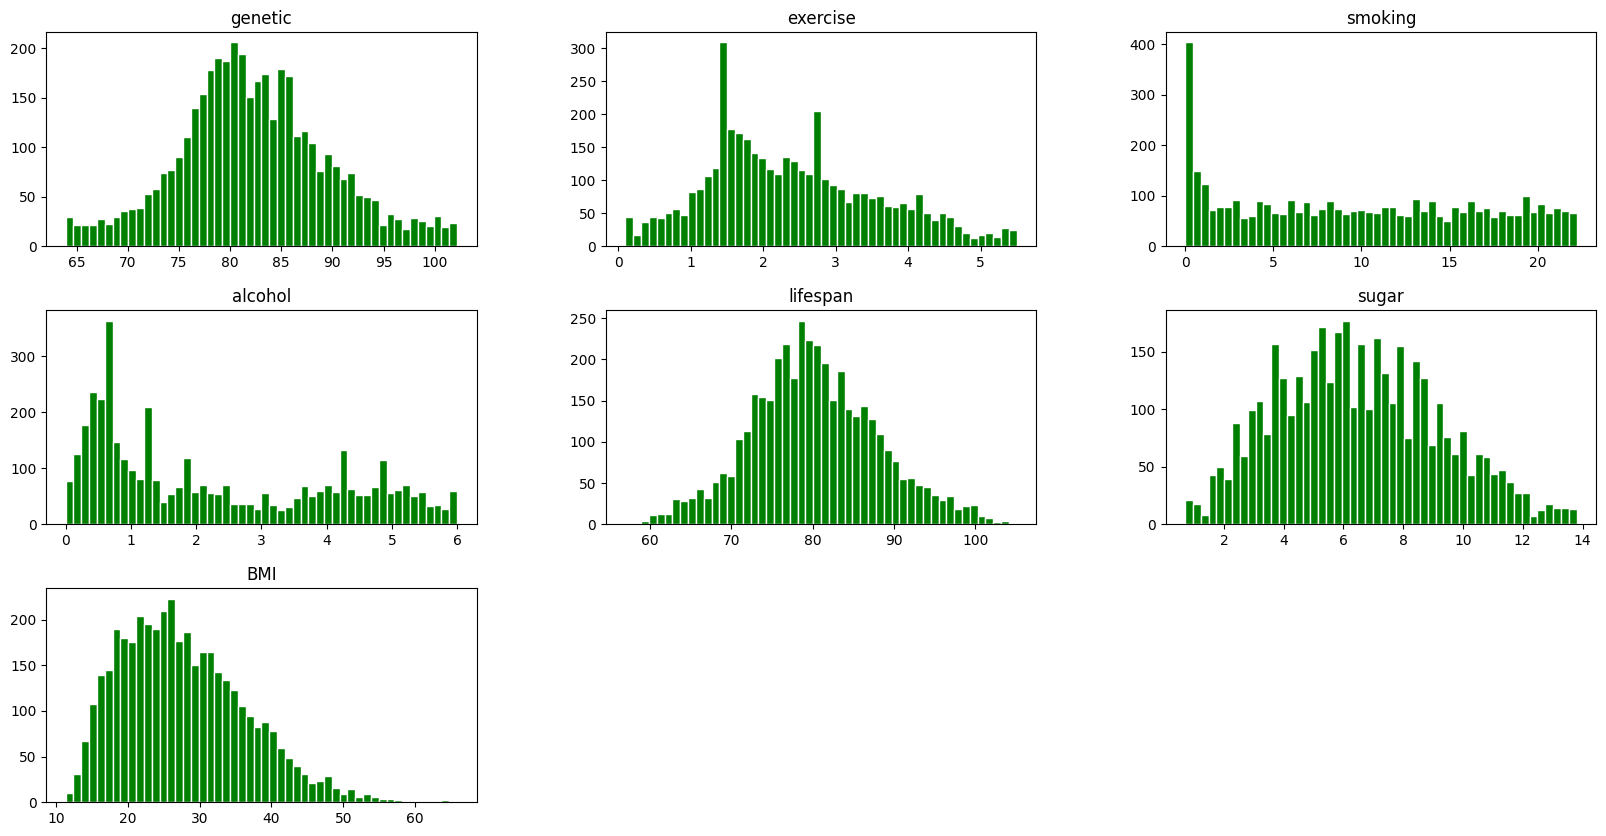

In [28]:
patient_DF =patient_DF.drop(["id","length", "mass"], axis = 1)

patient_DF_hist = patient_DF.hist( figsize=(20,10), grid = False, bins = 50, color = "green", ec = "white")


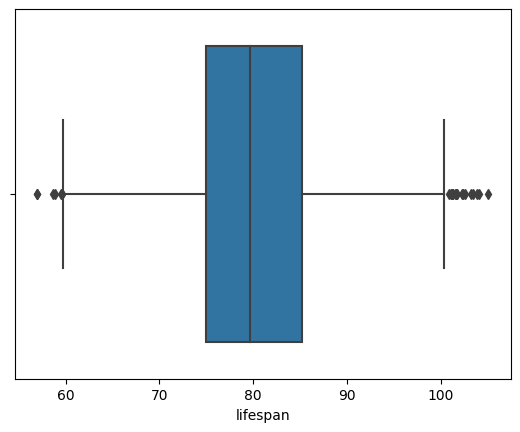

In [29]:
#outliers with box plot

sns.boxplot(x =patient_DF['lifespan'])

#to fine the record of outliers

Q1=patient_DF.quantile(0.25)
Q2=patient_DF.quantile(0.75)


In [30]:
patient_DF.describe()

,genetic,exercise,smoking,alcohol,lifespan,sugar,BMI
count,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000
mean,82.278624,2.403477,9.809035,2.266846,80.177693,6.487169,27.682015
std,7.441333,1.170426,6.918614,1.801044,7.840508,2.708622,8.711661
min,63.900000,0.100000,0.000000,0.000000,57.000000,0.700000,11.320500
25%,77.600000,1.500000,3.375000,0.600000,75.000000,4.400000,20.938542
50%,81.800000,2.200000,9.500000,1.700000,79.700000,6.300000,26.476726
75%,86.700000,3.200000,15.900000,4.000000,85.200000,8.400000,33.207260
max,102.200000,5.500000,22.200000,6.000000,105.100000,13.800000,65.869494


<Axes: >

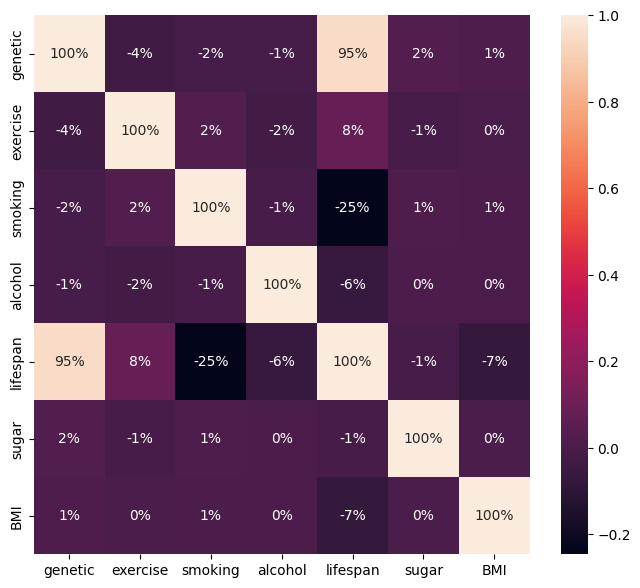

In [31]:
fig = plt.figure(figsize=(8,7))
sns.heatmap(patient_DF.corr(), annot = True, fmt='.0%')


In [32]:
patient_DF["PremieFactor"] = patient_DF["genetic"]/patient_DF["lifespan"]
display(patient_DF.transform(np.sort))

,genetic,exercise,smoking,alcohol,lifespan,sugar,BMI,PremieFactor
0,63.9,0.1,0.0,0.0,57.0,0.7,11.320500,0.932692
1,63.9,0.1,0.0,0.0,57.0,0.7,11.769727,0.936636
2,63.9,0.1,0.0,0.0,58.7,0.7,11.944275,0.941691
3,64.0,0.1,0.0,0.0,58.9,0.7,11.947403,0.944255
4,64.0,0.1,0.0,0.0,59.5,0.8,11.996117,0.945455
...,...,...,...,...,...,...,...,...
4091,102.1,5.4,22.1,6.0,103.2,13.8,61.562500,1.160305
4092,102.2,5.4,22.1,6.0,103.5,13.8,63.164062,1.162703
4093,102.2,5.4,22.1,6.0,103.9,13.8,64.099963,1.169059
4094,102.2,5.4,22.1,6.0,104.1,13.8,64.452812,1.183036


<Axes: xlabel='lifespan', ylabel='BMI'>

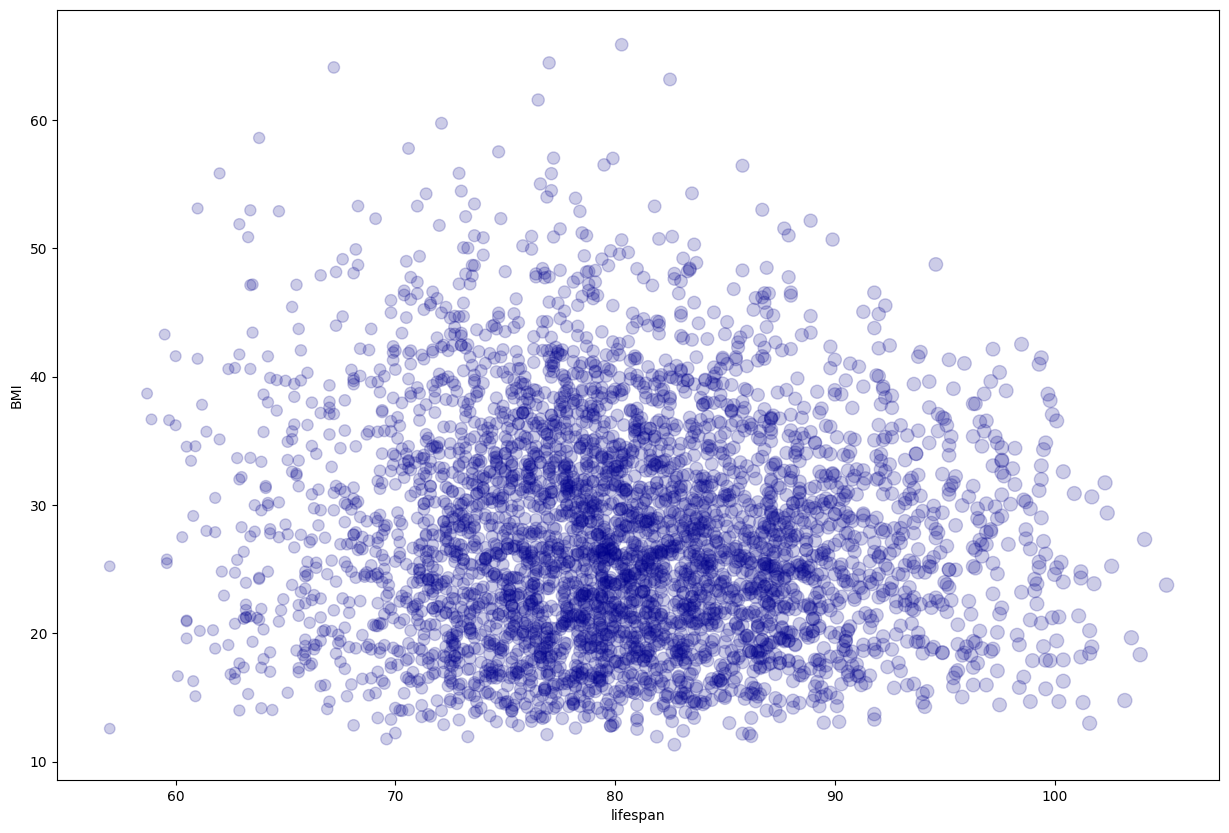

In [33]:
patient_DF.plot.scatter(x ='lifespan', y= 'BMI', s = 'lifespan' , c= 'darkblue',figsize= (15,10), alpha = 0.20)



In [34]:
#intervals = [20, 60, 80, 100, 120]
#col = patient_data['lifespan']
#patient_data['Age Groups'] = pd.cut(x=col, bins=intervals)
#patient_data['Age Groups']


In [35]:
#patient_data.groupby('Age Groups')['Age Groups'].count()

In [36]:
#patient_data_oh = pd.get_dummies(patient_data)
# Display the one-hot encoded dataframe
#patient_data_oh 

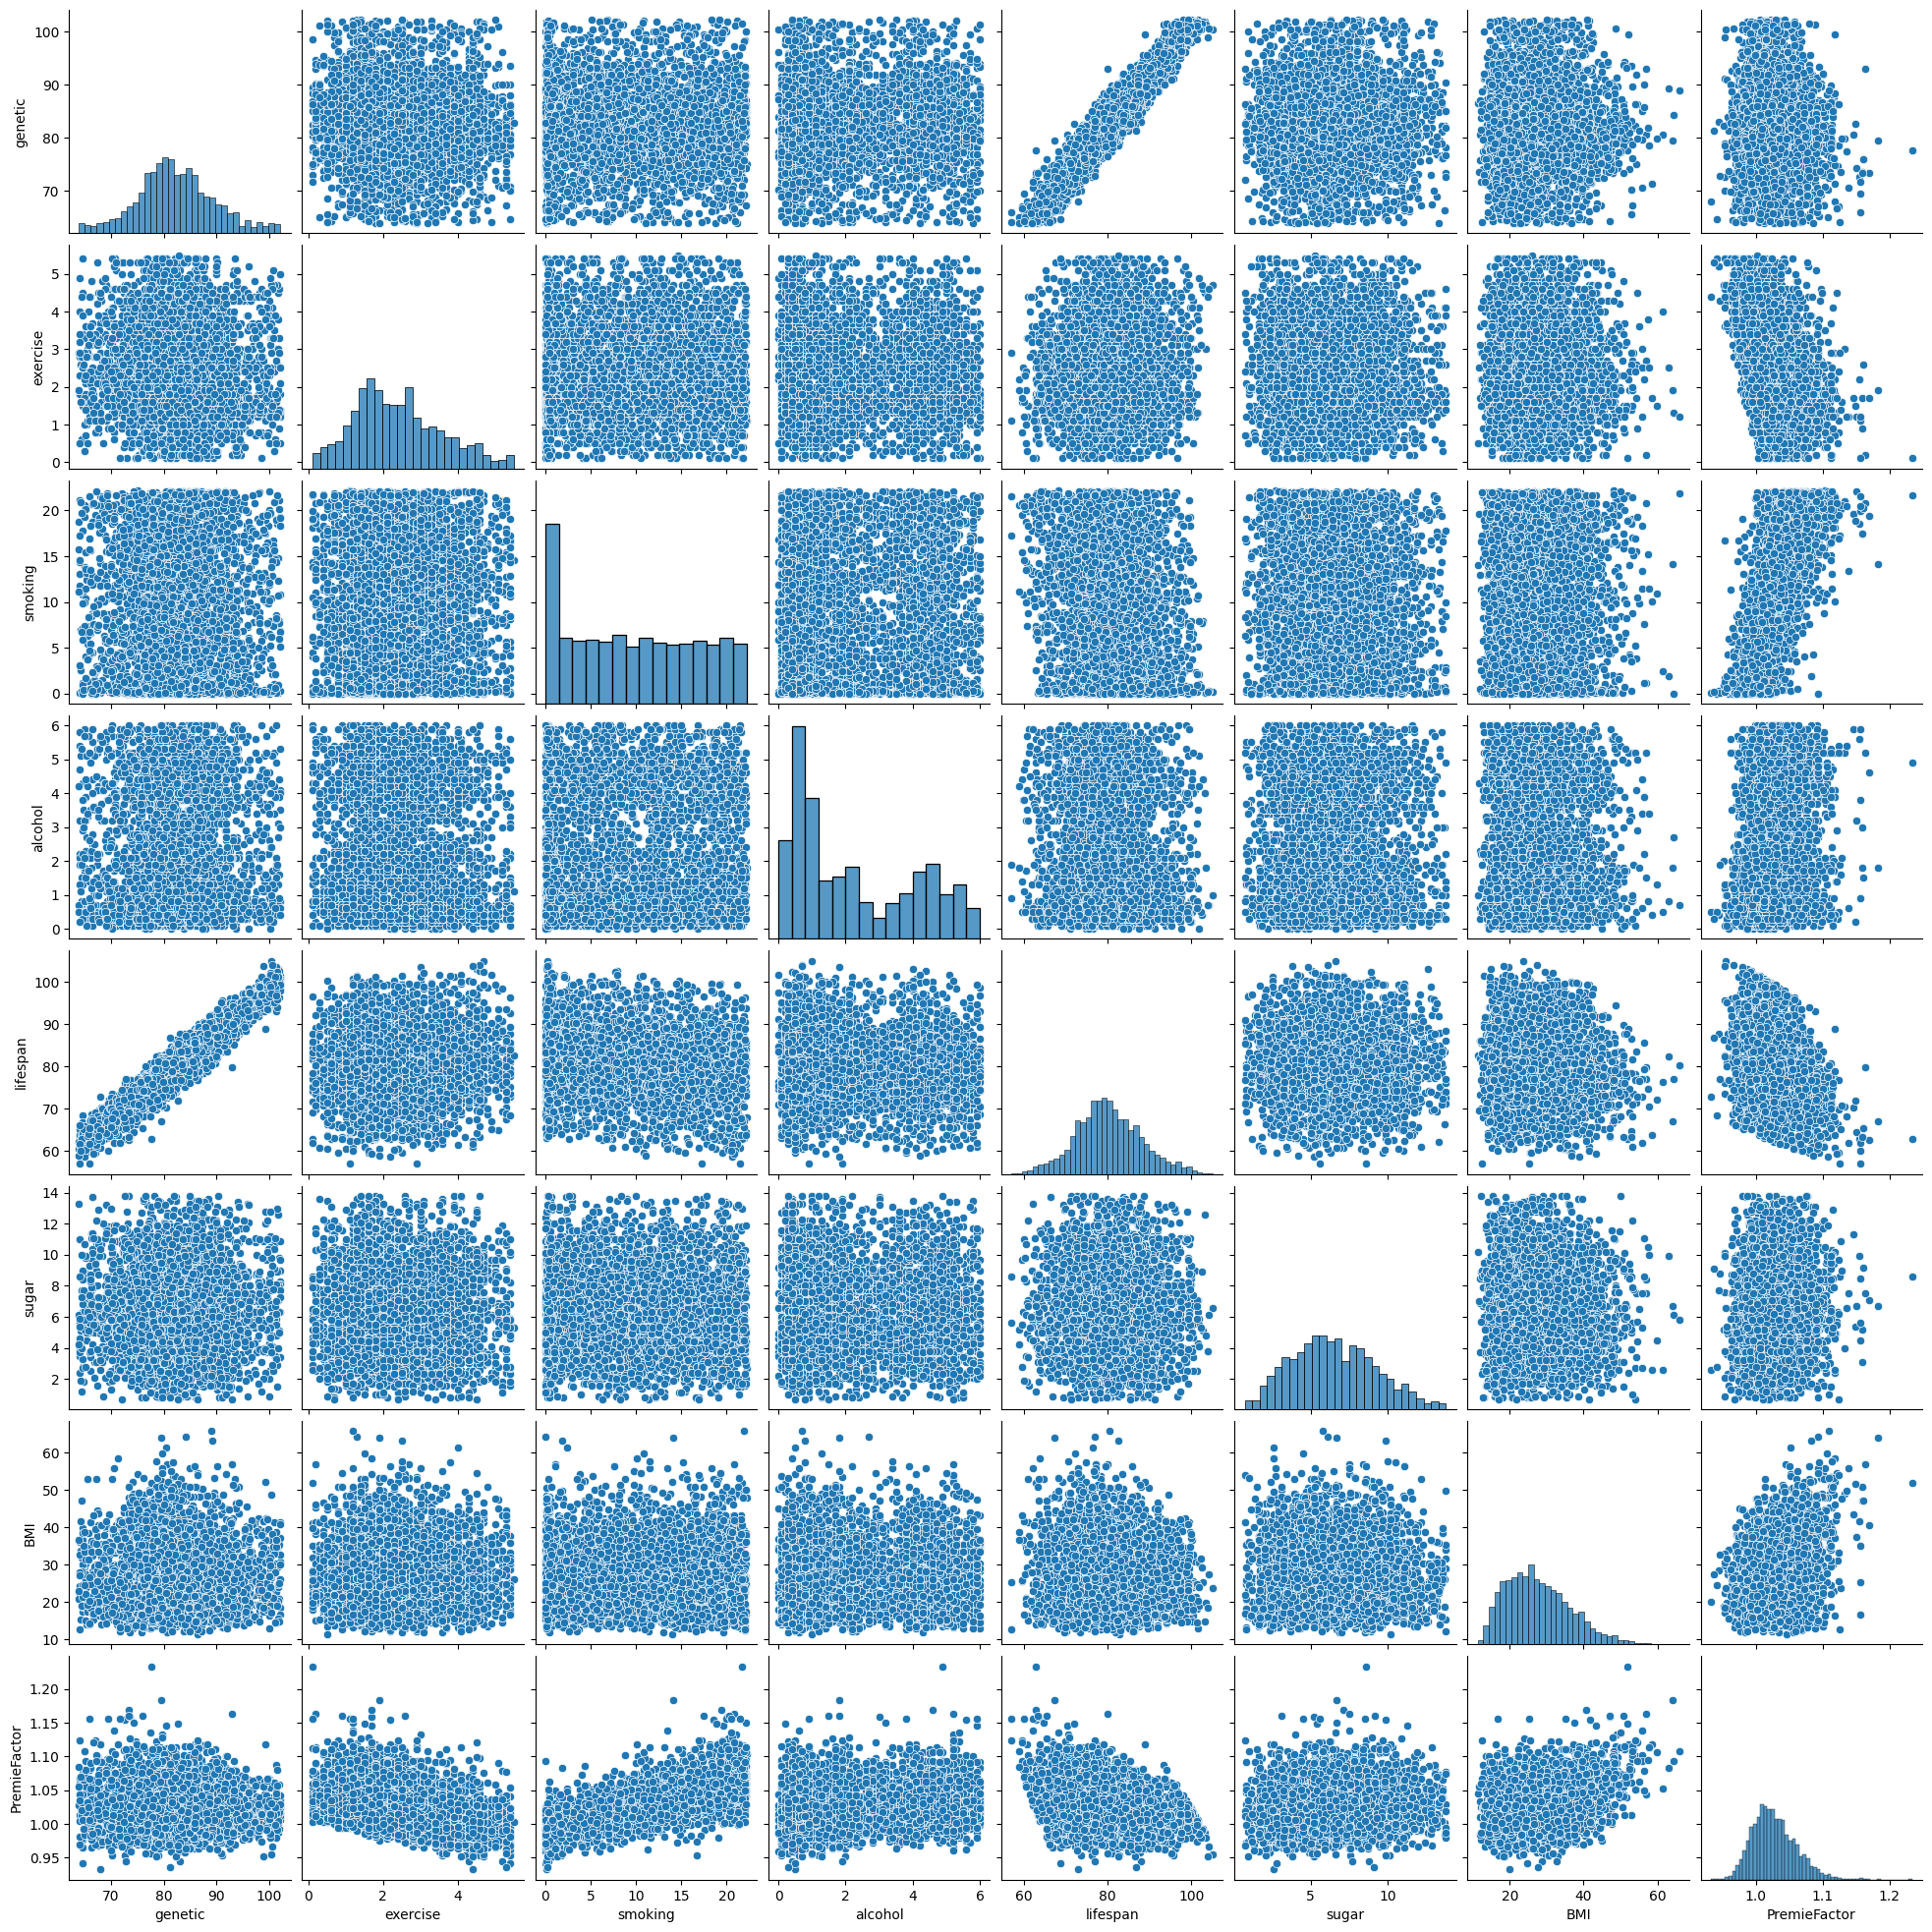

In [37]:
#patient_data = patient_data.drop(['length','mass'], axis =1)

sns.pairplot(patient_DF)

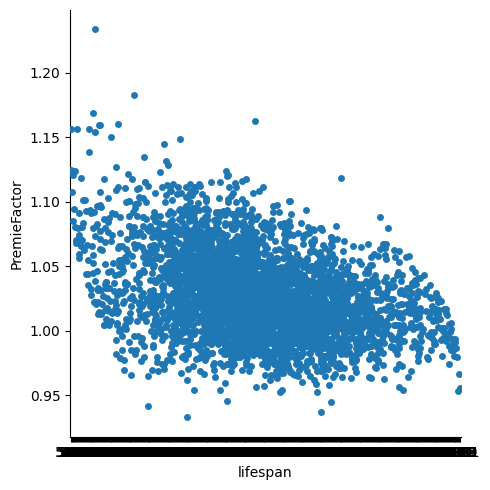

In [38]:
g = sns.catplot(x="lifespan", y="PremieFactor",
                data=patient_DF)

In [39]:
dfm = patient_DF.reset_index().melt(id_vars='index', var_name='variable', value_name='value')
display(dfm)
g = sns.catplot(data=dfm, kind='bar', col='index', col_wrap=4, x='variable', y='value', height=3)

# change the ticklabel rotation if needed
g.set_xticklabels(rotation=90)

# change ylim if needed
#g.set(ylim=(0, 30))


,index,variable,value
0,0,genetic,73.900000
1,1,genetic,86.000000
2,2,genetic,83.300000
3,3,genetic,82.800000
4,4,genetic,78.700000
...,...,...,...
32667,4091,PremieFactor,0.995043
32668,4092,PremieFactor,1.059072
32669,4093,PremieFactor,1.034444
32670,4094,PremieFactor,1.026350


ValueError: Image size of 1200x306300 pixels is too large. It must be less than 2^16 in each direction.

Error in callback <function _draw_all_if_interactive at 0x7f7165517640> (for post_execute):


ValueError: Image size of 1200x306300 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 1200x306300 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1200x306300 with 4084 Axes>